https://livebook.manning.com/#!/book/deep-learning-with-pytorch/chapter-4/v-4/18

### 4.1.1  Tabular Data

In [3]:
!wget archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2018-11-01 21:55:36--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/csv]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K   370KB/s    in 0.7s    

2018-11-01 21:55:37 (370 KB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [4]:
import numpy as np

In [5]:
wineq_numpy = np.loadtxt("winequality-white.csv", dtype=np.float32, delimiter=";", skiprows=1)

In [6]:
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [7]:
wineq_numpy.shape

(4898, 12)

In [8]:
import torch

In [9]:
wineq = torch.from_numpy(wineq_numpy)

In [10]:
wineq.shape

torch.Size([4898, 12])

In [11]:
data = wineq[:, :-1]

In [12]:
data.shape

torch.Size([4898, 11])

In [14]:
target = wineq[:, -1]
target

tensor([ 6.,  6.,  6.,  ...,  6.,  7.,  6.])

In [16]:
target = wineq[:, -1].long()
target

tensor([ 6,  6,  6,  ...,  6,  7,  6])

In [20]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.shape

torch.Size([4898, 10])

In [25]:
target.shape, target.unsqueeze(0).shape, target.unsqueeze(1).shape, target_onehot.shape

(torch.Size([4898]),
 torch.Size([1, 4898]),
 torch.Size([4898, 1]),
 torch.Size([4898, 10]))

In [32]:
target_onehot.scatter_(dim=1, index=target.unsqueeze(1), value=1.0)

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]])

In [35]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([   6.8548,    0.2782,    0.3342,    6.3914,    0.0458,   35.3081,
         138.3607,    0.9940,    3.1883,    0.4898,   10.5142])

In [36]:
data_var = torch.var(data, dim=0)
data_var

tensor([ 7.1211e-01,  1.0160e-02,  1.4646e-02,  2.5726e+01,  4.7733e-04,
         2.8924e+02,  1.8061e+03,  8.9455e-06,  2.2801e-02,  1.3025e-02,
         1.5144e+00])

In [39]:
data_normalized = (data-data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[  0.1721,  -0.0818,   0.2133,  ...,  -1.2468,  -0.3491,
          -1.3930],
        [ -0.6574,   0.2159,   0.0480,  ...,   0.7399,   0.0013,
          -0.8242],
        [  1.4756,   0.0174,   0.5438,  ...,   0.4750,  -0.4368,
          -0.3366],
        ...,
        [ -0.4204,  -0.3794,  -1.1915,  ...,  -1.3131,  -0.2615,
          -0.9054],
        [ -1.6054,   0.1167,  -0.2825,  ...,   1.0048,  -0.9625,
           1.8574],
        [ -1.0129,  -0.6770,   0.3785,  ...,   0.4750,  -1.4882,
           1.0448]])

In [42]:
data_bad = data[torch.le(target, 3).long()]
data_good = data[torch.ge(target, 7).long()]

In [43]:
torch.mean(data_bad, dim=0)

tensor([   6.9971,    0.2701,    0.3599,   20.6227,    0.0450,   44.8734,
         169.8448,    1.0010,    3.0012,    0.4501,    8.8033])

In [44]:
torch.mean(data_good, dim=0)

tensor([   6.8486,    0.2765,    0.3557,   16.5668,    0.0459,   38.2911,
         161.7762,    0.9995,    3.0649,    0.4586,    8.9518])

In [45]:
torch.le(target, 3)

tensor([ 0,  0,  0,  ...,  0,  0,  0], dtype=torch.uint8)

### 4.1.2  Time Series


In [47]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2018-11-01 22:33:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/zip]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   389KB/s    in 0.7s    

2018-11-01 22:33:05 (389 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [48]:
!unzip Bike-Sharing-Dataset.zip

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [79]:
import pandas as pd
df = pd.read_csv('hour.csv')
df.shape

(17379, 17)

In [80]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [81]:
df.dteday.value_counts().sort_index()

2011-01-01    24
2011-01-02    23
2011-01-03    22
2011-01-04    23
2011-01-05    23
2011-01-06    23
2011-01-07    23
2011-01-08    24
2011-01-09    24
2011-01-10    24
2011-01-11    22
2011-01-12    22
2011-01-13    24
2011-01-14    23
2011-01-15    24
2011-01-16    24
2011-01-17    24
2011-01-18    12
2011-01-19    23
2011-01-20    24
2011-01-21    24
2011-01-22    23
2011-01-23    23
2011-01-24    23
2011-01-25    23
2011-01-26    16
2011-01-27     8
2011-01-28    23
2011-01-29    23
2011-01-30    23
              ..
2012-12-02    24
2012-12-03    24
2012-12-04    24
2012-12-05    24
2012-12-06    24
2012-12-07    24
2012-12-08    24
2012-12-09    24
2012-12-10    24
2012-12-11    24
2012-12-12    24
2012-12-13    24
2012-12-14    24
2012-12-15    24
2012-12-16    24
2012-12-17    24
2012-12-18    24
2012-12-19    24
2012-12-20    24
2012-12-21    24
2012-12-22    24
2012-12-23    24
2012-12-24    23
2012-12-25    23
2012-12-26    24
2012-12-27    24
2012-12-28    24
2012-12-29    

In [82]:
bikes_numpy = np.loadtxt("hour.csv", dtype=np.float32, delimiter=",", skiprows=1, 
                         converters={1: lambda x: float(x[8:10])})

In [83]:
bikes_numpy[:, 1]

array([ 1.,  1.,  1., ..., 31., 31., 31.], dtype=float32)

In [84]:
bikes_numpy.shape

(17379, 17)

In [85]:
bikes = torch.from_numpy(bikes_numpy)

In [86]:
torch.sort(bikes[:, 0], dim=0)

(tensor([     1.,      2.,      3.,  ...,  17377.,  17378.,  17379.]),
 tensor([     0,      1,      2,  ...,  17376,  17377,  17378]))

In [87]:
_, sorted_row_idxs = torch.sort(bikes[:, 0], dim=0)

In [88]:
sorted_row_idxs

tensor([     0,      1,      2,  ...,  17376,  17377,  17378])

In [89]:
bikes = bikes[sorted_row_idxs]

In [76]:
bikes.shape[1]

17

In [99]:
daily_bikes = bikes[:17376].view(-1, 24, bikes.shape[1])

In [100]:
daily_bikes.shape

torch.Size([724, 24, 17])

In [101]:
bikes.stride()

(17, 1)

In [103]:
daily_bikes.stride()

(408, 17, 1)

In [104]:
daily_bikes = daily_bikes.transpose(1, 2)

In [105]:
daily_bikes.shape

torch.Size([724, 17, 24])

In [106]:
daily_bikes.stride()

(408, 1, 17)

In [108]:
daily_bikes[0].shape

torch.Size([17, 24])

In [109]:
weather_onehot = torch.zeros(bikes.shape[0], 4)
weather_onehot.scatter_(1, bikes[:, 9].long().unsqueeze(1)-1, 1.)

tensor([[ 1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        ...,
        [ 1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.]])

In [110]:
bikes = torch.cat((bikes, weather_onehot), 1)

In [111]:
bikes.shape

torch.Size([17379, 21])

In [128]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
daily_weather_onehot.scatter_(1, daily_bikes[:, 9, :].long().unsqueeze(1)-1, 1.)
daily_weather_onehot.shape

torch.Size([724, 4, 24])

In [124]:
daily_bikes.shape

torch.Size([724, 17, 24])

In [125]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [126]:
daily_bikes.shape

torch.Size([724, 21, 24])

In [115]:
daily_bikes[:, 9, :].long().shape

torch.Size([724, 24])

In [116]:
daily_bikes[:, 9, :].long().unsqueeze(1).shape

torch.Size([724, 1, 24])

### 4.1.3  Text

In [131]:
!wget http://www.gutenberg.org/files/1342/1342-0.txt

--2018-11-02 09:05:24--  http://www.gutenberg.org/files/1342/1342-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724725 (708K) [text/plain]
Saving to: ‘1342-0.txt’

1342-0.txt          100%[===================>] 707.74K  2.00MB/s    in 0.3s    

2018-11-02 09:05:25 (2.00 MB/s) - ‘1342-0.txt’ saved [724725/724725]



In [132]:
with open('1342-0.txt') as f: text = f.read()

In [135]:
type(text), len(text)

(str, 704190)

#### char level

In [146]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,'"
n_letters = len(all_letters)

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) 
                   if unicodedata.category(c) != 'Mn' and c in all_letters)

In [147]:
n_letters

56

In [148]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [153]:
lines = text.split('\n')

In [155]:
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [156]:
import torch
tensor = torch.zeros(len(line), n_letters)
tensor.shape

torch.Size([70, 56])

In [158]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = all_letters.find(letter)
    tensor[i][letter_index] = 1

Not so incidentally, this is the shape recurrent neural networks expect the input to be: (sentence_length, n_sentences, n_letters)

In [159]:
tensor = torch.unsqueeze(tensor, 1)
tensor.shape

torch.Size([70, 1, 56])

#### word level

In [181]:
all_words = text.lower().replace('\n', ' ').split()

len(all_words)

124592

In [189]:
punctuation = '.,;:"!?”“_-'
all_words = {word.strip(punctuation) for word in all_words}
type(all_words), len(all_words)

(set, 7261)

In [191]:
all_words = {w:i for i,w in enumerate(all_words)}

type(all_words), len(all_words)

(dict, 7261)

In [192]:
words_in_line = [word.strip(punctuation) for word in line.lower().split(' ')]
words_in_line

['impossible',
 'mr',
 'bennet',
 'impossible',
 'when',
 'i',
 'am',
 'not',
 'acquainted',
 'with',
 'him']

In [193]:
tensor = torch.zeros(len(words_in_line), len(all_words))
tensor.shape

torch.Size([11, 7261])

In [194]:
for i, word in enumerate(words_in_line):
    tensor[i][all_words[word]] = 1

We can use unsqueeze to make room for an extra dimension, to obtain a (sequence_length, n_sentences, n_words) shaped tensor

In [196]:
tensor = tensor.unsqueeze(1)
tensor.shape

torch.Size([11, 1, 7261])

### 4.1.4  Audio

In [198]:
import scipy.io.wavfile as wavfile

In [200]:
freq, waveform_arr = wavfile.read('1-100038-A-14.wav')

In [201]:
freq

44100

In [202]:
waveform_arr

array([ -388, -3387, -4634, ...,  2289,  1327,    90], dtype=int16)

In [203]:
waveform_arr.shape

(220500,)

In [204]:
waveform = torch.from_numpy(waveform_arr).float()

Depending on the kind of network employed for carrying out a task, for instance a sound classification task, we would be required to lay out the tensor in one of two ways.

For architectures based on filtering the 1D signal with cascades of learned filter banks, such as convolutional networks, we would need to lay out the tensor as B x C x L, where B is the batch (the number of sounds in a dataset), C the number of channels and L the number of samples in time.

Conversely, for architectures that incorporate the notion of temporal sequences, just as recurrent networks we mentioned for text, data needs to be laied out as L x B x C - sequence length comes first. Intuitively, this is because the latter architectures take one set of C values at a time - the signal is not considered as a whole, but as an individual input changing in time.

This is the same as above (text).

In [205]:
from scipy import signal

In [206]:
f_arr, t_arr, sp_arr = signal.spectrogram(waveform_arr, freq)

In [208]:
[o.shape for o in (f_arr, t_arr, sp_arr)]

[(129,), (984,), (129, 984)]

In [209]:
sp = torch.from_numpy(sp_arr)

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

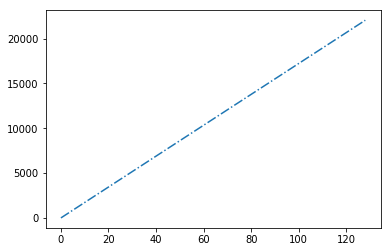

In [217]:
plt.plot(f_arr, '-.')

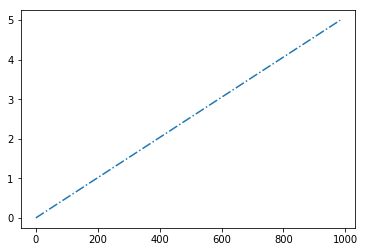

In [218]:
plt.plot(t_arr, '-.')

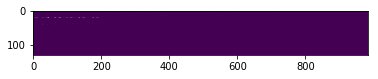

In [221]:
plt.imshow(sp_arr)

In [222]:
sp_left_tensor = torch.from_numpy(sp_arr)
sp_right_tensor = torch.from_numpy(sp_arr)

In [223]:
sp_tensor = torch.stack((sp_left_tensor, sp_right_tensor), dim=0)

In [224]:
sp_tensor.shape

torch.Size([2, 129, 984])

In [225]:
sp_tensor.unsqueeze_(0)
sp_tensor.shape

torch.Size([1, 2, 129, 984])

If we want to build a dataset to use as input for a network, we will stack multiple spectrograms representing multiple sounds in a dataset along the first dimension, leading to a B x C x F x T tensor.

Such tensor is indistinguishable from what we would build for a dataset set of images, where F is represents rows and T columns of an image. Indeed, we would tackle a sound classification problem on spectrograms with the exact same networks. Time to tackle images now.

## 4.1.5  Images

In [226]:
import imageio

In [229]:
img_arr = imageio.imread('cats/cat3.jpg')

In [230]:
img_arr.shape

(256, 256, 3)

At this point, img is a NumPy array-like object with three dimensions: two spatial dimensions, width and height, and a third dimension correponding to channels

PyTorch modules dealing with image data require tensors to be laid out as C x H x W, channels, height and width, respectively.

In [231]:
img = torch.from_numpy(img_arr)
out = torch.transpose(img, 0, 2)
out.shape

torch.Size([3, 256, 256])

In [232]:
batch_size = 100
batch = torch.ByteTensor(batch_size, 3, 256, 256)

In [235]:
import os

In [240]:
data_dir = 'cats/'
filenames = [name for name in os.listdir(data_dir) if name.endswith('.png')]

filenames

['cat1.png', 'cat2.png', 'cat3.png']

In [272]:
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(data_dir+filename)
    img_arr = img_arr[...,:3]
    batch[i] = torch.transpose(torch.from_numpy(img_arr), 0, 2)

In [288]:
img_arr = imageio.imread(data_dir+filename)
img_arr.shape

(256, 256, 4)

In [290]:
img_arr[...,:3].shape

(256, 256, 3)

One possibility is to just divide the values of pixels by 255 (the maximum representable number in 8-bit unsigned):

In [292]:
batch = batch.float()
batch /= 255.

Another possibility is to compute mean and standard deviation of the input data and scale it so that the output has zero mean and unit standard deviation across each channel.

In [294]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

### 4.1.6  Volumetric Data

We just have an extra dimension, depth, after the channel dimension, leading to a 5D tensor of shape B x C x D x H x W.

In [ ]:
>>> import imageio

>>> vol_arr = imageio.volread(dirname, 'DICOM')
>>> vol_arr.shape

(256, 256, 50)

In [ ]:
>>> vol = torch.from_numpy(col_arr).float()
>>> vol = torch.transpose(vol, 0, 2)
>>> vol = torch.unsqueeze(vol, 0)

>>> vol.shape

torch.Size([1, 1, 50, 256, 256])

### Video Data

In [298]:
reader = imageio.get_reader('cockatoo.mp4')

In [299]:
meta = reader.get_meta_data()

In [300]:
meta

{'duration': 14.0,
 'ffmpeg_version': '3.2.4-tessus built with Apple LLVM version 8.0.0 (clang-800.0.42.1)',
 'fps': 20.0,
 'nframes': 280,
 'plugin': 'ffmpeg',
 'size': (1280, 720),
 'source_size': (1280, 720)}

In [306]:
n_channels = 3
n_frames = meta['nframes']
video = torch.FloatTensor(n_frames, n_channels, *meta['size'])

In [307]:
video.shape

torch.Size([280, 3, 1280, 720])

In [308]:
for i, frame in enumerate(reader):
    frame = torch.from_numpy(frame).float()
    video[i] = torch.transpose(frame, 0, 2)

In [309]:
frame.shape

torch.Size([720, 1280, 3])

In [310]:
torch.transpose(frame, 0, 2).shape

torch.Size([3, 1280, 720])